<a href="https://colab.research.google.com/github/NatnaelTDaba/CAP5610/blob/main/CAP5610_hw1_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('/content/drive/MyDrive/CAP5610/')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Q1-Q4

The code snippet in this section was used to answer questions 1-4 from the assignment.

The code snippet below i.e. train_df.columns is used to determine the features that are available in the training set.

In [17]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Q5

The code snippet in this section was used to answer question 5 from the assignment.

In [14]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [19]:
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

# Q6

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Q7

In [22]:
train_df_copy = train_df.copy(deep=True)
train_df_copy.drop(['Survived', 'PassengerId','Pclass'], axis=1).describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# Q8

In [18]:
train_df_q8 = train_df[['Pclass','Sex','Embarked']]

## Count

Computing **count** i.e. the total number of catergorical values per column.

In [19]:
train_df_q8.count()

Pclass      891
Sex         891
Embarked    889
dtype: int64

## Unique

Computing **unique** i.e. the total number of unique categorical values per column.

In [20]:
train_df_q8.nunique()

Pclass      3
Sex         2
Embarked    3
dtype: int64

## Top and freq

Computing **freq** and **top** i.e. total number of the most frequent categorical
value and the most frequent categorical value for each categorical feature.

In [21]:
for feature in list(train_df_q8.columns):
  val_count = train_df_q8[feature].value_counts()
  print("Categorical feature name:", feature )
  print("Categorical values:", list(val_count.index))
  print("Most freqquent categorical value: " + str(val_count.idxmax()))
  print("Number of most frequent categorical value: " + str(val_count.max()))
  print('='*80)

Categorical feature name: Pclass
Categorical values: [3, 1, 2]
Most freqquent categorical value: 3
Number of most frequent categorical value: 491
Categorical feature name: Sex
Categorical values: ['male', 'female']
Most freqquent categorical value: male
Number of most frequent categorical value: 577
Categorical feature name: Embarked
Categorical values: ['S', 'C', 'Q']
Most freqquent categorical value: S
Number of most frequent categorical value: 644


# Q9

In [22]:
train_df_q9 = train_df[['Pclass','Survived']].copy(deep=True)

In [23]:
pclass_1_surv = train_df_q9[train_df_q9['Pclass']==1]['Survived'].mean()
pclass_2_surv = train_df_q9[train_df_q9['Pclass']==2]['Survived'].mean()
pclass_3_surv = train_df_q9[train_df_q9['Pclass']==3]['Survived'].mean()
print("Survival liklihood of Pclass=1 passengers:", pclass_1_surv)
print("Survival liklihood of Pclass=2 passengers:", pclass_2_surv)
print("Survival liklihood of Pclass=3 passengers:", pclass_3_surv)

Survival liklihood of Pclass=1 passengers: 0.6296296296296297
Survival liklihood of Pclass=2 passengers: 0.47282608695652173
Survival liklihood of Pclass=3 passengers: 0.24236252545824846


# Q10

In [23]:
train_df_q10 = train_df[['Sex','Survived']].copy(deep=True)

In [24]:
female_survival = train_df_q10[train_df_q10['Sex'] == 'female']
male_survival = train_df_q10[train_df_q10['Sex'] == 'male']

In [25]:
female_surv_rate = female_survival.Survived.sum()/len(female_survival)
male_surv_rate = male_survival.Survived.sum()/len(male_survival)

In [26]:
print("fraction of the number of female passengers that survived", female_surv_rate)
print("fraction of the number of male passengers that survived", male_surv_rate)

fraction of the number of female passengers that survived 0.7420382165605095
fraction of the number of male passengers that survived 0.18890814558058924


# Q11

The code snippet below shows the histogram of ages for passengers that survived and died.

In [28]:
train_df_q11 = train_df[['Age','Survived']].copy(deep=True)
age_surv = train_df_q11[train_df_q11['Survived'] == 1]['Age']
age_no_surv = train_df_q11[train_df_q11['Survived'] == 0]['Age']

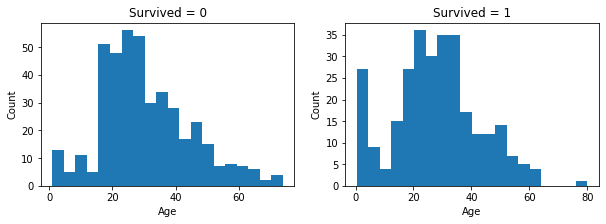

In [82]:
n_bins = 20
plt.figure(figsize=[10,3])
age_both = [age_no_surv, age_surv]
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.hist(age_both[i], bins=n_bins)
  plt.title("Survived = " + str(i)); plt.xlabel("Age"); plt.ylabel("Count");
plt.show()

The code snippet below computes the rate of survival for passengers with ages between 15 and 25.

In [30]:
train_df_q11.loc[(train_df_q11['Age'] >= 15)&(train_df_q11['Age']<=25),'Survived'].mean()

0.3542600896860987

In [34]:
train_df_q11[train_df_q11['Age'] == 80]

,Age,Survived
630,80.0,1


# Q12

In [31]:
train_df_q12 = train_df[['Age','Pclass','Survived']].copy(deep=True)

In [32]:
pclasses = [1, 2, 3]
survived = [0,1]
var_combs = np.array(np.meshgrid(pclasses, survived)).T.reshape(-1, 2) 

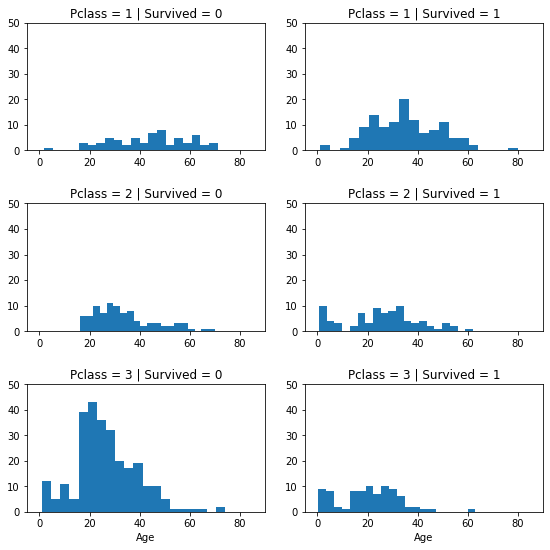

In [33]:
plt.figure(figsize=[8,8])
for i, (paclass, surv) in zip(range(1,len(var_combs)+1), var_combs):
  pclass_surv_age = train_df_q12.loc[(train_df_q12['Pclass']==paclass)&(train_df_q12['Survived']==surv),'Age']
  plt.subplot(3,2,i);plt.title('Pclass = '+str(paclass)+' | '+'Survived = ' + str(surv)); 
  plt.hist(pclass_surv_age,bins=20)
  axes = plt.gca()
  axes.set_ylim([0,50])
  axes.set_xlim([-5,90])
  if i > 4:
    plt.xlabel("Age")
plt.tight_layout(pad=2.0)

In [22]:
pclass_surv_age = train_df_q12.loc[(train_df_q12['Pclass']==1),'Survived']

In [24]:
pclass_surv_age.mean()

0.6296296296296297

In [39]:
train_df_q12.loc[(train_df_q12['Pclass']==3)&(train_df_q12['Age']<=4)]['Survived'].mean()

0.52

#Q13 

In [14]:
train_df_q13 = train_df[['Embarked','Sex','Fare','Survived']].copy(deep=True)

In [15]:
embarked = ['S', 'C', 'Q']
survived = [0,1]
var_combs13 = np.array(np.meshgrid(embarked, survived)).T.reshape(-1, 2) 
var_combs13

array([['S', '0'],
       ['S', '1'],
       ['C', '0'],
       ['C', '1'],
       ['Q', '0'],
       ['Q', '1']], dtype='<U21')

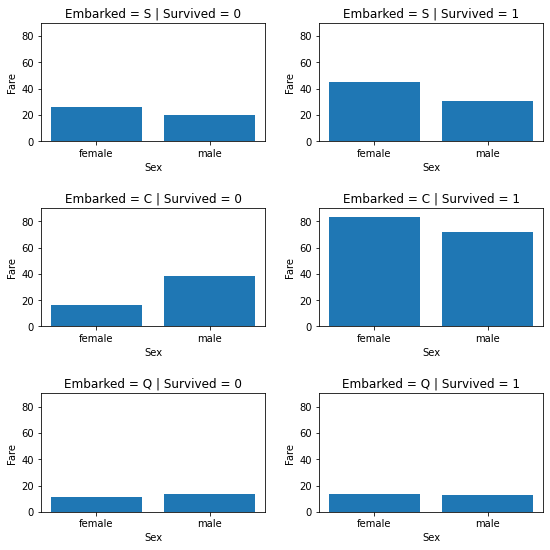

In [16]:
plt.figure(figsize=[8,8])
for i, (embrk, surv) in zip(range(1,len(var_combs13)+1), var_combs13):

  female_mean_fare = train_df_q13.loc[(train_df_q13['Embarked']==embrk)&(train_df_q13['Survived']==int(surv))&(train_df_q13['Sex']=='female'),'Fare'].mean()
  male_mean_fare = train_df_q13.loc[(train_df_q13['Embarked']==embrk)&(train_df_q13['Survived']==int(surv))&(train_df_q13['Sex']=='male'),'Fare'].mean()
  
  plt.subplot(3,2,i);plt.title('Embarked = '+str(embrk)+' | '+'Survived = ' + str(surv))
  axes = plt.gca()
  axes.set_ylim([0,90])
  plt.xlabel('Sex')
  plt.ylabel('Fare')
  
  sex_cat = ['female','male']

  plt.bar(sex_cat,[female_mean_fare,male_mean_fare])
plt.tight_layout(pad=2.0)

#Q14

In [44]:
train_df_q14 = train_df.copy(deep=True)

In [45]:
total = len(train_df_q14['Ticket'])
dup = train_df_q14.duplicated(subset='Ticket', keep='first').sum()
dup_rate = dup/total
print("Ticket feature duplication rate: ", dup_rate)

Ticket feature duplication rate:  0.2356902356902357


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
train_df_q14.duplicated(subset='Ticket', keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Length: 891, dtype: bool

# Q15

In [113]:
cabin_miss_train = train_df.isnull().sum().Cabin
cabin_miss_test = test_df.isnull().sum().Cabin
print("Number of missing values for Cabin feature in training data:", cabin_miss_train)
print("Number of missing values for Cabin feature in test data:", cabin_miss_test)
print("Total number of missing values for Cabin feature for the combined train and test data:", cabin_miss_train+cabin_miss_test)

Number of missing values for Cabin feature in training data: 687
Number of missing values for Cabin feature in test data: 327
Total number of missing values for Cabin feature for the combined train and test data: 1014


#Q16

In [47]:
train_df_q16 = train_df.copy(deep=True)

In [48]:
train_df_q16["Gender"] = np.where(train_df_q16["Sex"].str.contains("female"), 1, 0)

In [49]:
train_df_q16.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#Q17

In [59]:
from sklearn.impute import KNNImputer

In [60]:
train_df_q17 = train_df.copy(deep=True)

In [61]:
train_df_edit = train_df_q17.drop(['Name','Cabin','Ticket','PassengerId','Sex','Embarked'],1)

In [62]:
train_df_edit

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [65]:
imputer = KNNImputer(n_neighbors=5)
df_missing_filled = pd.DataFrame(imputer.fit_transform(train_df_edit),columns = train_df_edit.columns)

In [70]:
df_missing_filled

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22,1.0,0.0,7.2500
1,1.0,1.0,38,1.0,0.0,71.2833
2,1.0,3.0,26,0.0,0.0,7.9250
3,1.0,1.0,35,1.0,0.0,53.1000
4,0.0,3.0,35,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27,0.0,0.0,13.0000
887,1.0,1.0,19,0.0,0.0,30.0000
888,0.0,3.0,26,1.0,2.0,23.4500
889,1.0,1.0,26,0.0,0.0,30.0000


In [69]:
df_missing_filled

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22,1.0,0.0,7.2500
1,1.0,1.0,38,1.0,0.0,71.2833
2,1.0,3.0,26,0.0,0.0,7.9250
3,1.0,1.0,35,1.0,0.0,53.1000
4,0.0,3.0,35,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27,0.0,0.0,13.0000
887,1.0,1.0,19,0.0,0.0,30.0000
888,0.0,3.0,26,1.0,2.0,23.4500
889,1.0,1.0,26,0.0,0.0,30.0000


The code snippet below shows that the Age feature no longer has missing values.

In [67]:
df_missing_filled.isna().any()

Survived    False
Pclass      False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

#Q18

In [72]:
train_df_q18 = train_df.copy(deep=True)
freq_embark=train_df_q18['Embarked'].mode()[0]
train_df_q18['Embarked_missing_filled'] = train_df_q18['Embarked']
train_df_q18['Embarked_missing_filled'].fillna(freq_embark,inplace=True)

In [73]:
train_df_q18.isna().any()

PassengerId                False
Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                         True
SibSp                      False
Parch                      False
Ticket                     False
Fare                       False
Cabin                       True
Embarked                    True
Embarked_missing_filled    False
dtype: bool

#Q19

In [3]:
test_df_q19 = test_df.copy(deep=True)

Fare feature before filling missing value.

In [4]:
test_df_q19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_fare_mode = test_df_q19['Fare'].mode()[0]

In [10]:
test_df_q19['Fare'].fillna(test_fare_mode, inplace=True)

Fare feature after filling missing value.

In [11]:
test_df_q19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#Q20

In [54]:
train_df_q20 = train_df.copy(deep=True)
train_df_q20['Fare_Ordinal'] = np.zeros((len(train_df_q20),1),'int64')

In [55]:
band_order_pair = {0:(-0.001, 7.91),
                   1:(7.91, 14.454),
                   2:(14.454, 31.0),
                   3:(31.0, 512.329)}
for order, (low, high) in band_order_pair.items():
  train_df_q20.loc[(train_df_q20["Fare"]>low) & (train_df_q20["Fare"]<=high),'Fare_Ordinal'] = order

In [56]:
train_df_q20[['Fare','Fare_Ordinal']]

,Fare,Fare_Ordinal
0,7.2500,0
1,71.2833,3
2,7.9250,1
3,53.1000,3
4,8.0500,1
...,...,...
886,13.0000,1
887,30.0000,2
888,23.4500,2
889,30.0000,2
